In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.stem import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud as WC
from PIL import Image
import re

from sklearn.model_selection import train_test_split

In [2]:
# def total_words(text):

IndentationError: expected an indented block (2523777439.py, line 1)

**`text`** - The text of a tweet. A keyword from that tweet (although this may be blank!)

**`location`** - The location the tweet was sent from (may also be blank)

**What am I predicting?**
I am predicting whether a given tweet is about a real disaster or not. If so, predict a 1. If not, predict a 0.The text of a tweet

In [4]:
tw_df = pd.read_csv("train.csv")

In [5]:
tw_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
tw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
tw_df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [8]:
tw_df.location.unique()

array([nan, 'Birmingham', 'Est. September 2012 - Bristol', ...,
       'Vancouver, Canada', 'London ', 'Lincoln'], dtype=object)

In [9]:
tw_df.keyword.unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [10]:
tw_df["keyword"] = tw_df["keyword"].str.replace("%20", " ")
tw_df["keyword"]

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
7608    NaN
7609    NaN
7610    NaN
7611    NaN
7612    NaN
Name: keyword, Length: 7613, dtype: object

In [11]:
mode_keyword = tw_df['keyword'].mode().values[0]
mode_keyword

'fatalities'

In [12]:
tw_df["location"].mode()

0    USA
Name: location, dtype: object

In [13]:
tw_df[tw_df["location"].isnull()]["keyword"].value_counts()

razed                  25
detonation             24
explosion              21
suicide bomber         20
nuclear disaster       19
                       ..
collision               3
epicentre               3
snowstorm               3
radiation emergency     3
threat                  1
Name: keyword, Length: 221, dtype: int64

In [14]:
tw_df.drop("location", axis=1, inplace=True)

In [15]:
tw_df.head()

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [16]:
tw_df["keyword"].fillna(mode_keyword, inplace=True)

In [17]:
tw_df.isnull().sum()

id         0
keyword    0
text       0
target     0
dtype: int64

In [18]:
tw_df.reset_index(drop=True, inplace=True)

In [19]:
tw_df.drop("id", axis=1, inplace=True)

In [20]:
count = 0
for word in tw_df['text']:
  if "#" in word:
    count += 1
    print(word)

Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
13,000 people receive #wildfires evacuation orders in California 
Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 
#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires
#flood #disaster Heavy rain causes flash flooding of streets in Manitou, Colorado Springs areas
Haha South Tampa is getting flooded hah- WAIT A SECOND I LIVE IN SOUTH TAMPA WHAT AM I GONNA DO WHAT AM I GONNA DO FVCK #flooding
#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count 
#Flood in Bago Myanmar #We arrived Bago
Damage to school bus on 80 in multi car crash #BREAKING 
We always try to bring the heavy. #metal #RT http://t.co/YAo1e0xngw
#AFRICANBAZE: Breaking news:Nigeria flag set ablaze in Aba. http://t.co/2nndBGwyEi
@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze thi

In [21]:
count

1761

In [22]:
tw_df['text'].str.lower()

0       our deeds are the reason of this #earthquake m...
1                  forest fire near la ronge sask. canada
2       all residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       just got sent this photo from ruby #alaska as ...
                              ...                        
7608    two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @thetawniest the out of control w...
7610    m1.94 [01:04 utc]?5km s of volcano hawaii. htt...
7611    police investigating after an e-bike collided ...
7612    the latest: more homes razed by northern calif...
Name: text, Length: 7613, dtype: object

In [23]:
re_url = re.compile('https?://\S+|www\.\S+')


In [24]:
def remove_url(text):
  
  re_url = re.compile('https?://\S+|www\.\S+')
  return re_url.sub("", text)

In [25]:
tw_df["text"].apply(remove_url)

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610          M1.94 [01:04 UTC]?5km S of Volcano Hawaii. 
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [32]:
def hashtags(text):
  re_hash = re.compile("#\S+")
  return ", ".join(re_hash.findall(text))


In [33]:
tw_df["text"].apply(hashtags)

0               #earthquake
1                          
2                          
3                #wildfires
4       #Alaska, #wildfires
               ...         
7608                       
7609                       
7610                       
7611                       
7612                       
Name: text, Length: 7613, dtype: object

In [37]:
stop_words = stopwords.words('english')
stop_words

AttributeError: 'list' object has no attribute 'words'

In [38]:
tw_df["text"] = tw_df["text"].apply(lambda x: " ".join([i for i in x.split() if i not in stopwords]))

In [39]:
tw_df

,keyword,text,target
0,fatalities,Our Deeds Reason #earthquake May ALLAH Forgive us,1
1,fatalities,Forest fire near La Ronge Sask. Canada,1
2,fatalities,All residents asked 'shelter place' notified o...,1
3,fatalities,"13,000 people receive #wildfires evacuation or...",1
4,fatalities,Just got sent photo Ruby #Alaska smoke #wildfi...,1
...,...,...,...
7608,fatalities,Two giant cranes holding bridge collapse nearb...,1
7609,fatalities,@aria_ahrary @TheTawniest The control wild fir...,1
7610,fatalities,M1.94 [01:04 UTC]?5km S Volcano Hawaii. http:/...,1
7611,fatalities,Police investigating e-bike collided car Littl...,1


In [40]:

import nltk
from nltk.stem.snowball import SnowballStemmer

snowBallStemmer = SnowballStemmer("english")

sentence = "Provision Maximum multiply owed caring on go gone going was this"
wordList = nltk.word_tokenize(sentence)

stemWords = [snowBallStemmer.stem(word) for word in wordList]

print(' '.join(stemWords))

provis maximum multipli owe care on go gone go was this


In [67]:
snow_stem = SnowballStemmer("english")

def stemmer(text):

  # wordlist = word_tokenize(text)

  tokens = text.split()
  stemmed_tokens = [snow_stem.stem(token) for token in tokens]

  return stemmed_tokens

In [68]:
stemmer = SnowballStemmer("english")

stemmer.stem("I am exceedingly annoyed")


'i am exceedingly annoy'

In [70]:
tw_df["text"].apply(stemmer, axis=1)

TypeError: 'SnowballStemmer' object is not callable

In [45]:
word_tokenize("happy days are ahead")

['happy', 'days', 'are', 'ahead']

In [73]:
stemmer = PorterStemmer()

wordlist = word_tokenize(text)

words = [stemmer.stem(word) for word in wordlist]

" ".join(words)

NameError: name 'text' is not defined

In [83]:
def stemmer(text):
  stemmer = SnowballStemmer("english")

  wordlist = word_tokenize(text)

  words = [stemmer.stem(word) for word in wordlist]

  return " ".join(words)

In [84]:
tw_df["text"].apply(stemmer)

0         our deed reason # earthquak may allah forgiv us
1                  forest fire near la rong sask . canada
2       all resid ask shelter place ' notifi offic . n...
3       13,000 peopl receiv # wildfir evacu order cali...
4       just got sent photo rubi # alaska smoke # wild...
                              ...                        
7608    two giant crane hold bridg collaps nearbi home...
7609    @ aria_ahrari @ thetawniest the control wild f...
7610    m1.94 [ 01:04 utc ] ? 5km s volcano hawaii . h...
7611    polic investig e-bik collid car littl portug ....
7612    the latest : more home raze northern californi...
Name: text, Length: 7613, dtype: object

In [85]:
tw_df["text"].str.replace(r"[^\w\s]+", " ")


/tmp/ipykernel_89294/2642683350.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  tw_df["text"].str.replace(r"[^\w\s]+", " ")


0       Our Deeds Reason  earthquake May ALLAH Forgive us
1                  Forest fire near La Ronge Sask  Canada
2       All residents asked  shelter place  notified o...
3       13 000 people receive  wildfires evacuation or...
4       Just got sent photo Ruby  Alaska smoke  wildfi...
                              ...                        
7608    Two giant cranes holding bridge collapse nearb...
7609     aria_ahrary  TheTawniest The control wild fir...
7610    M1 94  01 04 UTC 5km S Volcano Hawaii  http t ...
7611    Police investigating e bike collided car Littl...
7612    The Latest  More Homes Razed Northern Californ...
Name: text, Length: 7613, dtype: object

In [91]:
wordcloud = WC(
  width=800, height=800
).generate(" ".join(tw_df["text"].tolist()))

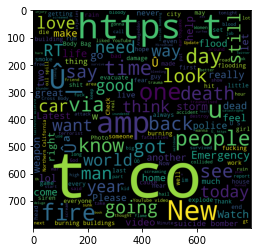

In [92]:
plt.imshow(wordcloud)